## Introduction

In this week’s discussion section, we will create some interactive plots to better undertsand how lasso and ridge regression are at work. To do so, we will use synthesized data that is made with the intention of better understanding how ridge and lasso regression are different based on the relationship of your parameters. It is important to note that your results with real data may look very different - unlike this notebook, the real world data you will be working with was not made to better understand regression models.

## Data Loading

Copy the code below to load the neessary libraries genereate the data we will use. Read the comments to on each feature to get an idea of the relationship between variables.

In [8]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from ipywidgets import interact, FloatLogSlider

# Generate data
np.random.seed(42)
n_samples = 200
X = np.zeros((n_samples, 6))
X[:, 0] = np.random.normal(0, 1, n_samples)  # X1 - Important feature
X[:, 1] = np.random.normal(0, 1, n_samples)  # X2 -  Important feature
X[:, 2] = X[:, 0] + np.random.normal(0, 0.1, n_samples)  # Correlated with X1
X[:, 3] = X[:, 1] + np.random.normal(0, 0.1, n_samples)  # Correlated with X2
X[:, 4] = np.random.normal(0, 0.1, n_samples)  # Noise
X[:, 5] = np.random.normal(0, 0.1, n_samples)  # Noise

y = 3 * X[:, 0] + 2 * X[:, 1] + 0.5 * X[:, 2] + np.random.normal(0, 0.1, n_samples) 

## Regression

Now that you have your data, do the following:

1. Split your data into training and testing.
2. Create and fit a ridge regression
3. Calculate the MSE and  for your ridge regression.
4. Create and fit a lasso model.
5. Calculate the MSE and  for your lasso model.


In [10]:
# 1. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [11]:
# 2. Create and fit ridge regression
ridge_model = Ridge() # default alpha = 10 when not specified
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)

# 3. Calculate RMSE and R^2 for Ridge regression
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))
ridge_r2 = r2_score(y_test, ridge_predictions)
print("Ridge Regression RMSE:", ridge_rmse)
print("Ridge Regression R^2:", ridge_r2)

Ridge Regression RMSE: 0.14410020171824975
Ridge Regression R^2: 0.9984722762470865


In [22]:
# 3. Create and fit Lasso regression model
lasso_model = Lasso() # default alpha = 10 when not specified
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)


# Calculate RMSE and R^2  for Lasso regression
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_predictions))
lasso_r2 = r2_score(y_test, lasso_predictions)

print("Ridge Regression RMSE:", lasso_rmse)
print("Ridge Regression R^2:", lasso_r2)

Ridge Regression RMSE: 1.2984978990079017
Ridge Regression R^2: 0.8759496036905758


In [13]:
# Visualize alphas against RMSE for lasso and ridge



In [ ]:
# Create function for creating plot

## Coefficient Bar Plot

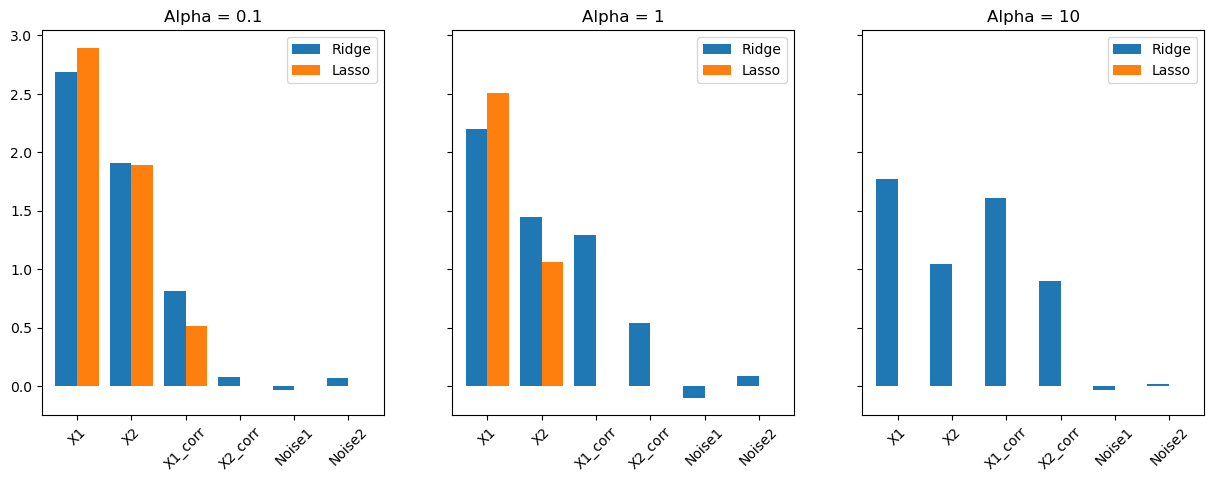

In [21]:
# Define alphas
alphas = [0.1, 1, 10]

# initialize empty list
data = []

# update alphas as we go
for alpha in alphas:
    ridge = Ridge(alpha = alpha).fit(X_train, y_train)
    lasso = Lasso(alpha = alpha).fit(X_train, y_train)
    data.append(pd.DataFrame({
        'Ridge': ridge.coef_,
        'Lasso': lasso.coef_
    }, index = ['X1', 'X2', "X1_corr", 'X2_corr', 'Noise1', 'Noise2']))
    
fig, ax = plt.subplots(1,3, figsize = (15,5), sharey = True)

# create plots
for i,df in enumerate(data): # i tracks current plot location, df is one dataframe in data. use enumerate when looping thru miltiple things
    df.plot.bar(ax = ax[i], width = 0.8)
    ax[i].set_title(f'Alpha = {alphas[i]}')
    ax[i].set_xticklabels(df.index, rotation = 45)
    
plt.show()